# `Projeto Titanic: Engenharia de Software para Cientistas de Dados`

---------------------------------------------------

## Tabela de Conteúdo :

- 1 -
- 2 -
- 3 -
- 4 -
- 5 - 


-----------------------------------



## `1 - Introdução`

O Projeto Titanic é um desafio clássico de ciência de dados que consiste em prever a sobrevivência dos passageiros do Titanic com base em seus dados demográficos e de viagem. Este projeto visa aplicar os conceitos de engenharia de software (CI/CD) no desenvolvimento de modelos de machine learning, desde a exploração dos dados até a implementação em produção.

### Desafios

O dia a dia de um cientista de dados é repleto de desafios, como dados mal estruturados e dificuldades na implementação de modelos em produção. Este projeto busca superar esses desafios através da aplicação de boas práticas de engenharia de software.

### Objetivos

* Exercitar a construção de modelos seguindo os conceitos de engenharia de software (CI/CD).
* Explorar os dados e realizar a engenharia de features.
* Implementar um pipeline automático para a produção do modelo.


### CI/CD

CI/CD (Integração Contínua/Entrega Contínua) é uma prática de engenharia de software que visa automatizar a construção, teste e implementação de software. Neste projeto, o CI/CD será utilizado para automatizar o pipeline de machine learning.


--------------------------------

## `1.2 Informações do Conjunto de Dados`

* **Conjunto de Treinamento:**
    * 891 linhas
    * 12 atributos
    * Inclui a variável alvo "Survived" (Sobreviveu)
* **Conjunto de Teste:**
    * 418 linhas
    * 11 atributos
    * Não inclui a variável alvo "Survived"

### Visão Geral

* **PassengerId**: É o ID único da linha e não tem nenhum efeito na variável alvo.
* **Survived**: É a variável alvo que estamos tentando prever (0 ou 1):
    * 1 = Sobreviveu
    * 0 = Não Sobreviveu
* **Pclass (Classe do Passageiro)**: É o status socioeconômico do passageiro e é um atributo categórico ordinal que possui 3 valores únicos (1, 2 ou 3):
    * 1 = Classe Alta
    * 2 = Classe Média
    * 3 = Classe Baixa
* **Name (Nome), Sex (Sexo) e Age (Idade)**: São autoexplicativos.
* **SibSp**: É o número total de irmãos e cônjuges do passageiro.
* **Parch**: É o número total de pais e filhos do passageiro.
* **Ticket (Bilhete)**: É o número do bilhete do passageiro.
* **Fare (Tarifa)**: É a tarifa paga pelo passageiro.
* **Cabin (Cabine)**: É o número da cabine do passageiro.
* **Embarked (Embarque)**: É o porto de embarque e é um atributo categórico que possui 3 valores únicos (C, Q ou S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton


----------------------------

## `2 - Import de Libnames`

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [82]:
# Função de cria pra achar missing values
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

## `2.1 - Leitura e análise de informações macro`

In [83]:
df_train = pd.read_csv("/Users/jacksoncosta/Documents/IA_ANHEMBI/TITANIC_KAGGLE/data/titanic_train_20250313190533.csv")
df_test = pd.read_csv("/Users/jacksoncosta/Documents/IA_ANHEMBI/TITANIC_KAGGLE/data/titanic_test_20250313190528.csv")

In [84]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [85]:
df_all = concat_df(df_train, df_test)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [86]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
df_train.info()
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C


## `3 - Limpeza de dados`

In [88]:
missing_value_table(df_train)

,Missing Values,% Value
Cabin,687,77
Age,177,19
Embarked,2,0
PassengerId,0,0
Survived,0,0
Pclass,0,0
Name,0,0
Sex,0,0
SibSp,0,0
Parch,0,0


In [89]:
missing_value_table(df_test)

,Missing Values,% Value
Cabin,327,78
Age,86,20
Fare,1,0
PassengerId,0,0
Pclass,0,0
Name,0,0
Sex,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0


Para avaliar o impacto dos dados faltantes nas variáveis 'Age', 'Cabin', 'Embarked' e 'Fare', é crucial determinar a relevância dessas variáveis para o problema de previsão de sobrevivência no Titanic. A correlação de Pearson pode ser utilizada para quantificar a relação linear entre essas variáveis e a variável alvo 'Survived'.".

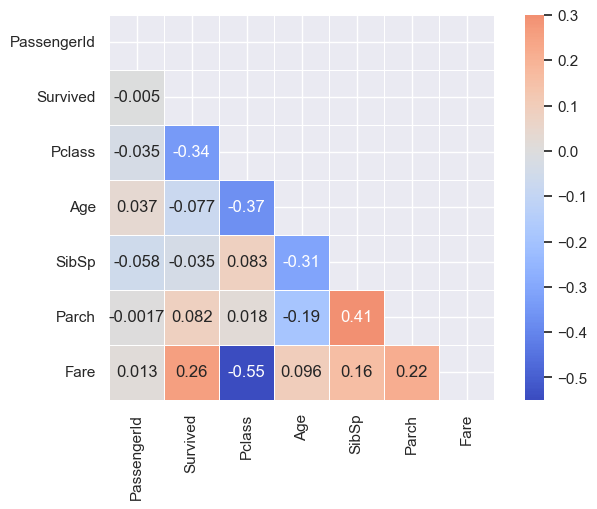

In [90]:

# Selecionar apenas as colunas numéricas
numeric_cols = df_train.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação de Pearson
correlation_matrix = df_train[numeric_cols]


plt.figure(figsize=(8,5))
corr=correlation_matrix.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(correlation_matrix.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()


## `3.1 Age`

Para tratar os valores ausentes na coluna 'Idade', a mediana global foi inicialmente considerada. No entanto, essa abordagem pode obscurecer nuances importantes nos dados. Uma estratégia mais refinada é calcular a mediana da idade para cada 'Pclass' (Classe do Passageiro) individualmente. Essa escolha se justifica pela forte correlação observada entre 'Pclass' e 'Idade' (0.408), bem como com a variável 'Sobreviveu' (0.338), sugerindo que a classe do passageiro é um fator determinante na distribuição das idades."

In [91]:
def corr_idade(df):
    numeric_df = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas
    corr = numeric_df.corr().abs().unstack().sort_values(ascending=False).reset_index()
    corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
    return corr[corr['Feature 1'] == 'Age']

# Exemplo de uso:
corr_idade(df_all)

,Feature 1,Feature 2,Correlation
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


Para aumentar a precisão na imputação dos valores ausentes na coluna 'Idade', a variável 'Sexo' foi utilizada como um segundo nível de agrupamento (groupby), em conjunto com 'Pclass' (Classe do Passageiro). Observa-se que os grupos formados pela combinação de 'Pclass' e 'Sexo' apresentam medianas de idade distintas. Conforme a classe do passageiro aumenta, a mediana da idade também aumenta, tanto para homens quanto para mulheres. No entanto, as mulheres tendem a apresentar medianas de idade ligeiramente inferiores às dos homens. As medianas de idade obtidas por esses grupos foram utilizadas para preencher os valores faltantes na coluna 'Idade'.

In [92]:

# Calcula a mediana da idade por sexo e classe de passageiro
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])['Age'].median()

for (sex, pclass), median_age in age_by_pclass_sex.items():
    print(f'Mediana de idade Pclass {pclass} {sex}: {median_age}')

print(f'Mediana de idade para todos os passageiros: {df_all["Age"].median()}')

# Preenche os valores ausentes na coluna 'Age' com as medianas por sexo e classe
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Verifica se ainda há valores ausentes na coluna 'Age'
print(f'Valores ausentes em Age após o preenchimento: {df_all["Age"].isnull().sum()}')

Mediana de idade Pclass 1 female: 36.0
Mediana de idade Pclass 2 female: 28.0
Mediana de idade Pclass 3 female: 22.0
Mediana de idade Pclass 1 male: 42.0
Mediana de idade Pclass 2 male: 29.5
Mediana de idade Pclass 3 male: 25.0
Mediana de idade para todos os passageiros: 28.0
Valores ausentes em Age após o preenchimento: 0


## `3.2 Embarked`

A variável 'Embarked' é categórica e apresenta apenas 2 valores ausentes em todo o conjunto de dados. Ambos os passageiros são mulheres, de classe alta, e compartilham o mesmo número de bilhete. Isso indica que se conhecem e embarcaram juntos no mesmo porto. A moda da variável 'Embarked' para mulheres de classe alta é 'C' (Cherbourg). No entanto, isso não garante que necessariamente tenham embarcado nesse porto.

In [93]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Após pesquisa online por 'Stone, Mrs. George Nelson (Martha Evelyn)', encontrei a informação de que ela embarcou em 'S' (Southampton) com sua empregada, Amelie Icard, conforme detalhado na página 'Martha Evelyn Stone: 
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

***"A Sra. Stone embarcou no Titanic em Southampton, em 10 de abril de 1912, viajando em primeira classe com sua empregada, Amelie Icard. Ela ocupou a cabine B-28."***

Com base nessas informações, os valores ausentes na variável 'Embarque' foram preenchidos com 'S'.

In [94]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

## `3.3 Fare`

Há apenas um passageiro com valor ausente na 'Fare' (Tarifa). Podemos assumir que a 'Fare' esteja relacionada ao tamanho da família (Parch e SibSp) e à 'Pclass' (Classe do Passageiro). A mediana da 'Tarifa' para um passageiro do sexo masculino, com bilhete de terceira classe e sem família, é uma escolha lógica para preencher o valor ausente.

In [95]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [96]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

## `3.4 Cabin`

A variável 'Cabine' apresenta complexidades e requer uma análise mais aprofundada. A maior parte dos valores da 'Cabine' está ausente, e a variável não pode ser completamente ignorada, pois algumas cabines podem estar associadas a taxas de sobrevivência mais elevadas. Constatou-se que a primeira letra dos valores da 'Cabine' indica os decks onde as cabines estão localizadas. Esses decks eram predominantemente designados para uma única classe de passageiros, embora alguns fossem utilizados por múltiplas classes.

*Detalhes dos Decks*

* No Deck do Barco, existiam 6 compartimentos identificados como T, U, W, X, Y e Z, mas apenas a cabine T está presente no conjunto de dados.
* Os decks A, B e C eram destinados exclusivamente aos passageiros de 1ª classe.
* Os decks D e E eram acessíveis a todas as classes.
* Os decks F e G eram compartilhados pelos passageiros de 2ª e 3ª classes.
* Ao progredir de A para G, a distância até a escadaria aumenta, o que pode ter influenciado a taxa de sobrevivência.

*Implicações*

A localização da cabine pode ser um fator relevante na análise da sobrevivência dos passageiros. A distribuição dos decks por classe de passageiros sugere uma possível correlação entre a classe e a probabilidade de sobrevivência, considerando a distância das cabines até as escadarias.

*Próximos Passos*

* Analisar a distribuição de sobreviventes por deck.
* Criar uma nova variável categórica representando o deck da cabine.
* Investigar se a distância da cabine até a escadaria influencia a taxa de sobrevivência.


In [97]:
# Criando a coluna Deck com a primeira letra da coluna Cabine. ( M sendo valores Misssing)


df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

# Apply aplica uma função para cada elemento da coluna Cabin.me 
# Lambda é uma forma de declarar uma função sem precisar instaciar, um formato de funçao anonima. Isso significa que vc pode usar a funçao sem precisar declarar um nome pra ela. Bom pra criar funçoes descartaveis.


df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

# Agrupando Pclass por Deck para entender a distribuição entre os Decks.


In [98]:
df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

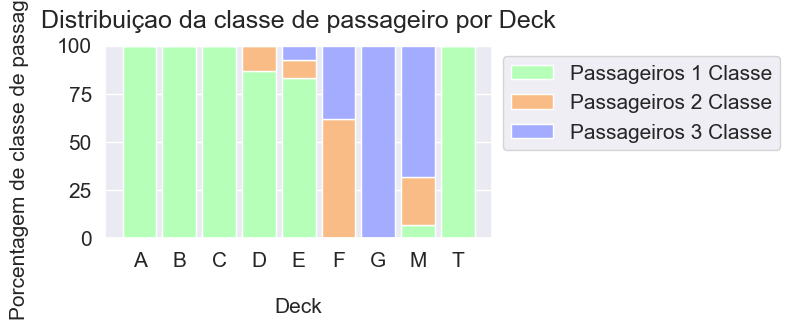

In [99]:
def get_pclass_dist(df):
    
    # Criando um dicionário para a contagem de passageiros de cada classe em cada deck.
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages


def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(5, 2.5))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passageiros 1 Classe')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passageiros 2 Classe')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passageiros 3 Classe')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Porcentagem de classe de passageiro', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Distribuiçao da classe de passageiro por Deck', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [100]:
all_deck_per

{'A': [100.0, 0.0, 0.0],
 'B': [100.0, 0.0, 0.0],
 'C': [100.0, 0.0, 0.0],
 'D': [86.95652173913044, 13.043478260869565, 0.0],
 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707],
 'F': [0.0, 61.904761904761905, 38.095238095238095],
 'G': [0.0, 0.0, 100.0],
 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219],
 'T': [100.0, 0.0, 0.0]}

A totalidade dos passageiros acomodados nos conveses A, B e C pertence à 1ª classe.

No convés D, observa-se uma distribuição de 87% de passageiros da 1ª classe e 13% da 2ª classe. Já no convés E, a predominância da 1ª classe se mantém em 83%, seguida por 10% de passageiros da 2ª classe e 7% da 3ª classe.

O convés F apresenta uma inversão na composição social, com 62% de passageiros da 2ª classe e os 38% restantes pertencentes à 3ª classe. No extremo oposto, o convés G é habitado exclusivamente por passageiros da 3ª classe.

Há, ainda, uma única pessoa na cabine T, situada no convés do barco, pertencente à 1ª classe. Como essa cabine apresenta semelhança maior com as do convés A, o passageiro foi agrupado junto a essa categoria.

Por fim, os passageiros identificados com a letra M representam valores ausentes na variável Cabin. Dada a impossibilidade de determinar com precisão seus conveses de origem, optei por tratá-los como pertencentes a um "convés M", garantindo consistência na análise.

In [101]:
# Agrupando o unico passageiro na Cabine T para a A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

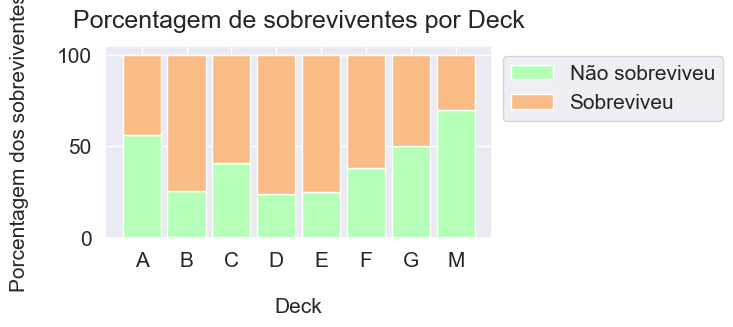

In [102]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(5, 2.5))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Não sobreviveu")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Sobreviveu")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Porcentagem dos sobreviventes', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Porcentagem de sobreviventes por Deck', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [103]:
all_surv_per

{'A': [56.25, 43.75],
 'B': [25.53191489361702, 74.46808510638297],
 'C': [40.67796610169492, 59.32203389830508],
 'D': [24.242424242424242, 75.75757575757575],
 'E': [25.0, 75.0],
 'F': [38.46153846153847, 61.53846153846154],
 'G': [50.0, 50.0],
 'M': [70.01455604075691, 29.985443959243085]}

Os conveses A, B e C foram unificados sob a sigla ABC, pois todos abrigam exclusivamente passageiros da 1ª classe.

Os conveses D e E foram agrupados como DE, devido à similaridade na distribuição de classes e à mesma taxa de sobrevivência.

Da mesma forma, os conveses F e G foram combinados como FG, seguindo o mesmo critério.

O grupo M, por sua natureza distinta e sua menor taxa de sobrevivência, permanece isolado, sem necessidade de agrupamento com os demais conveses.

In [104]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

In [105]:
# Excluir a coluna Cabin já que criamos a coluna Deck que representa a mesma informação.
df_all.drop(['Cabin'], inplace=True, axis=1)

In [106]:
missing_value_table(df_all)

,Missing Values,% Value
Survived,418,31
Age,0,0
Embarked,0,0
Fare,0,0
Name,0,0
Parch,0,0
PassengerId,0,0
Pclass,0,0
Sex,0,0
SibSp,0,0


In [107]:
df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

In [108]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} de {} passageiros sobreviveram, o que representa {:.2f}% do conjunto de treinamento.'.format(survived, df_train.shape[0], survived_per))
print('{} de {} passageiros não sobreviveram, o que representa {:.2f}% do conjunto de treinamento.'.format(not_survived, df_train.shape[0], not_survived_per))

342 de 891 passageiros sobreviveram, o que representa 38.38% do conjunto de treinamento.
549 de 891 passageiros não sobreviveram, o que representa 61.62% do conjunto de treinamento.


In [109]:
df_train.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Deck'],
      dtype='object')

## `4. Correlações`

In [110]:
# Remover colunas não numéricas
numeric_train = df_train.select_dtypes(include=['number'])
numeric_test = df_test.select_dtypes(include=['number'])

# Calcular correlação para df_train
df_train_corr = numeric_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

# Calcular correlação para df_test
df_test_corr = numeric_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

# Exibir os DataFrames de correlação
print("Correlação no conjunto de treinamento:")
print(df_train_corr_nd.head())

print("\nCorrelação no conjunto de teste:")
print(df_test_corr_nd.head())

Correlação no conjunto de treinamento:
   Feature 1 Feature 2  Correlation Coefficient
6       Fare    Pclass                 0.549500
8        Age    Pclass                 0.417667
10     Parch     SibSp                 0.414838
12    Pclass  Survived                 0.338481
14      Fare  Survived                 0.257307

Correlação no conjunto de teste:
   Feature 1 Feature 2  Correlation Coefficient
6     Pclass      Fare                 0.577489
8        Age    Pclass                 0.526789
10       Age      Fare                 0.345347
12     SibSp     Parch                 0.306895
14     Parch      Fare                 0.230410


In [111]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Age,Pclass,0.417667
10,Parch,SibSp,0.414838
12,Pclass,Survived,0.338481
14,Fare,Survived,0.257307
16,Age,SibSp,0.249747
18,Parch,Fare,0.216225
20,Parch,Age,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [112]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577489
8,Age,Pclass,0.526789
10,Age,Fare,0.345347
12,SibSp,Parch,0.306895
14,Parch,Fare,0.230410
16,Fare,SibSp,0.172032


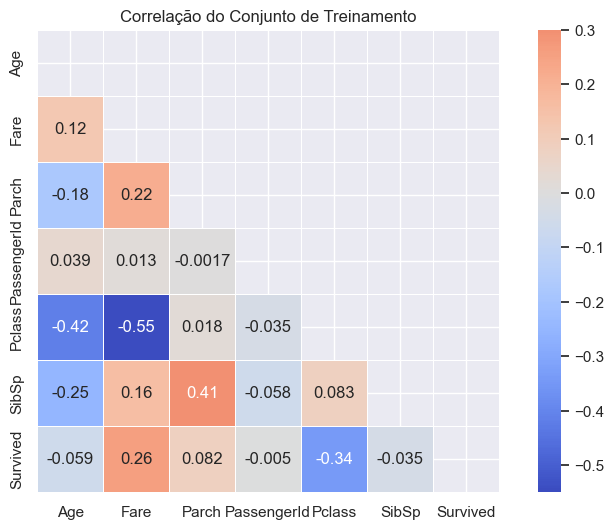

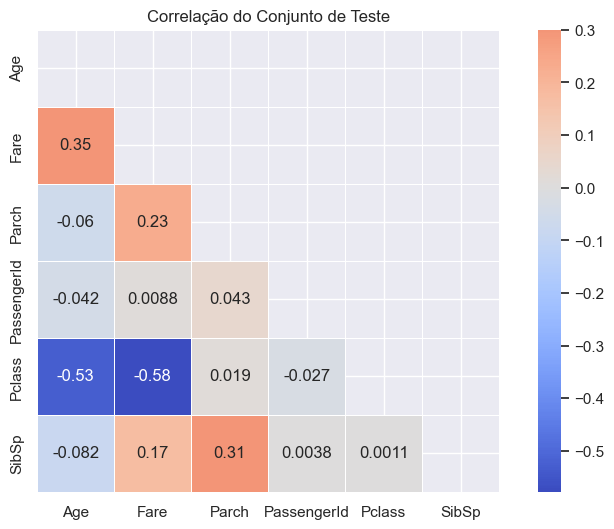

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df1, df2, title1="Correlação do DataFrame Treino", title2="Correlação do DataFrame Teste"):
    """
    Plota mapas de calor de correlação para dois DataFrames numéricos.

    Args:
        df1 (pd.DataFrame): O primeiro DataFrame numérico.
        df2 (pd.DataFrame): O segundo DataFrame numérico.
        title1 (str): Título para o mapa de calor do DataFrame 1.
        title2 (str): Título para o mapa de calor do DataFrame 2.
    """

    # Selecionar apenas as colunas numéricas para ambos os DataFrames
    numeric_cols_df1 = df1.select_dtypes(include=np.number).columns
    numeric_cols_df2 = df2.select_dtypes(include=np.number).columns

    # Calcular a matriz de correlação de Pearson para ambos os DataFrames
    corr_df1 = df1[numeric_cols_df1].corr()
    corr_df2 = df2[numeric_cols_df2].corr()

    # Criar máscaras para ocultar a parte superior da matriz (opcional)
    mask_df1 = np.triu(np.ones_like(corr_df1, dtype=bool))
    mask_df2 = np.triu(np.ones_like(corr_df2, dtype=bool))

    # Plotar o mapa de calor para o DataFrame 1
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_df1, mask=mask_df1, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, annot=True)
    plt.title(title1)
    plt.show()

    # Plotar o mapa de calor para o DataFrame 2
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_df2, mask=mask_df2, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, annot=True)
    plt.title(title2)
    plt.show()

# Exemplo de uso
# Supondo que df_train e df_test já estejam carregados

plot_correlation_heatmap(df_train, df_test, "Correlação do Conjunto de Treinamento", "Correlação do Conjunto de Teste")

## `4.1 Distribuição da variavel Target entre as variáveis.`

## `4.1.2 - Caracteríticas continuas`

As duas variáveis contínuas, Idade e Tarifa, apresentam pontos de divisão bem definidos e picos significativos, o que facilita o aprendizado de um modelo baseado em árvores de decisão. No entanto, há um possível problema: enquanto a distribuição dessas variáveis no conjunto de treinamento exibe mais picos e variações, no conjunto de teste, ela se apresenta de forma mais suavizada. Essa discrepância pode comprometer a capacidade do modelo de generalizar corretamente para novos dados.

A análise da distribuição da variável Idade revela que crianças com menos de 15 anos possuem uma taxa de sobrevivência consideravelmente superior à de qualquer outro grupo etário.

Já na variável Tarifa, observa-se que a taxa de sobrevivência é mais alta nas extremidades da distribuição. Além disso, a presença de valores extremamente elevados gera um viés positivo, tornando a distribuição assimétrica à direita.

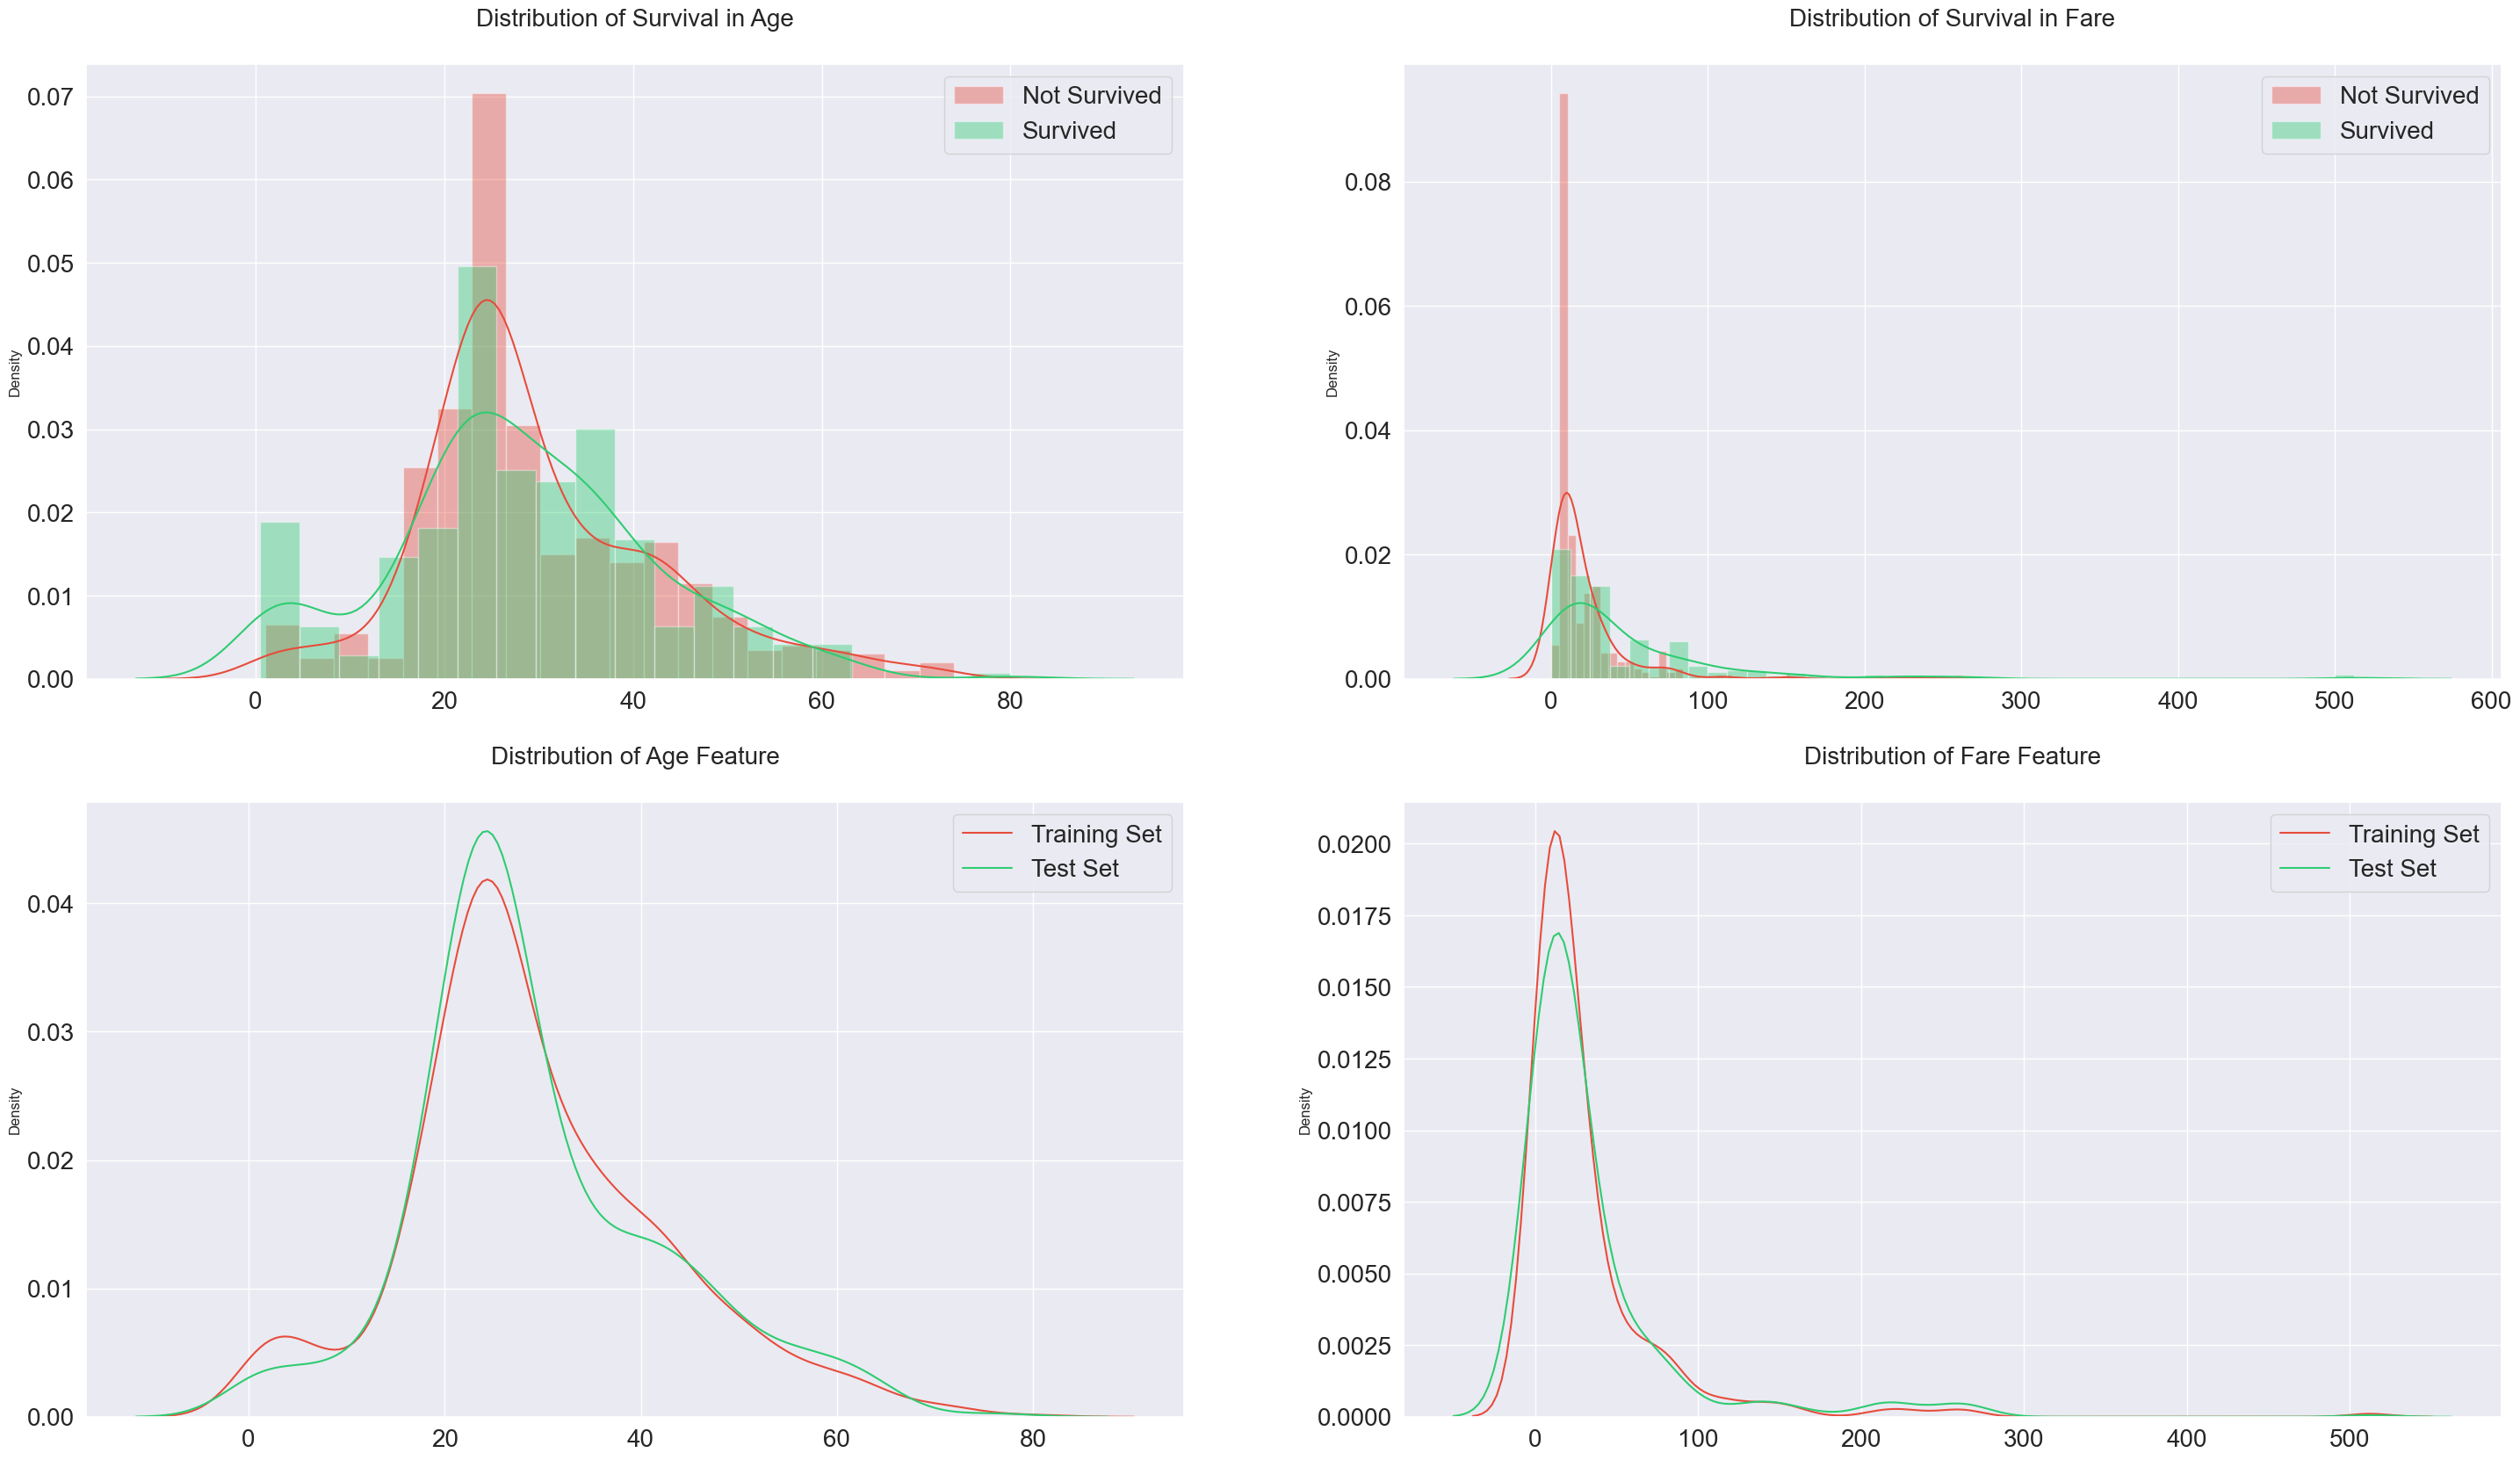

In [114]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(df_train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

## `4.1.2 - Variaveis Categoricas`

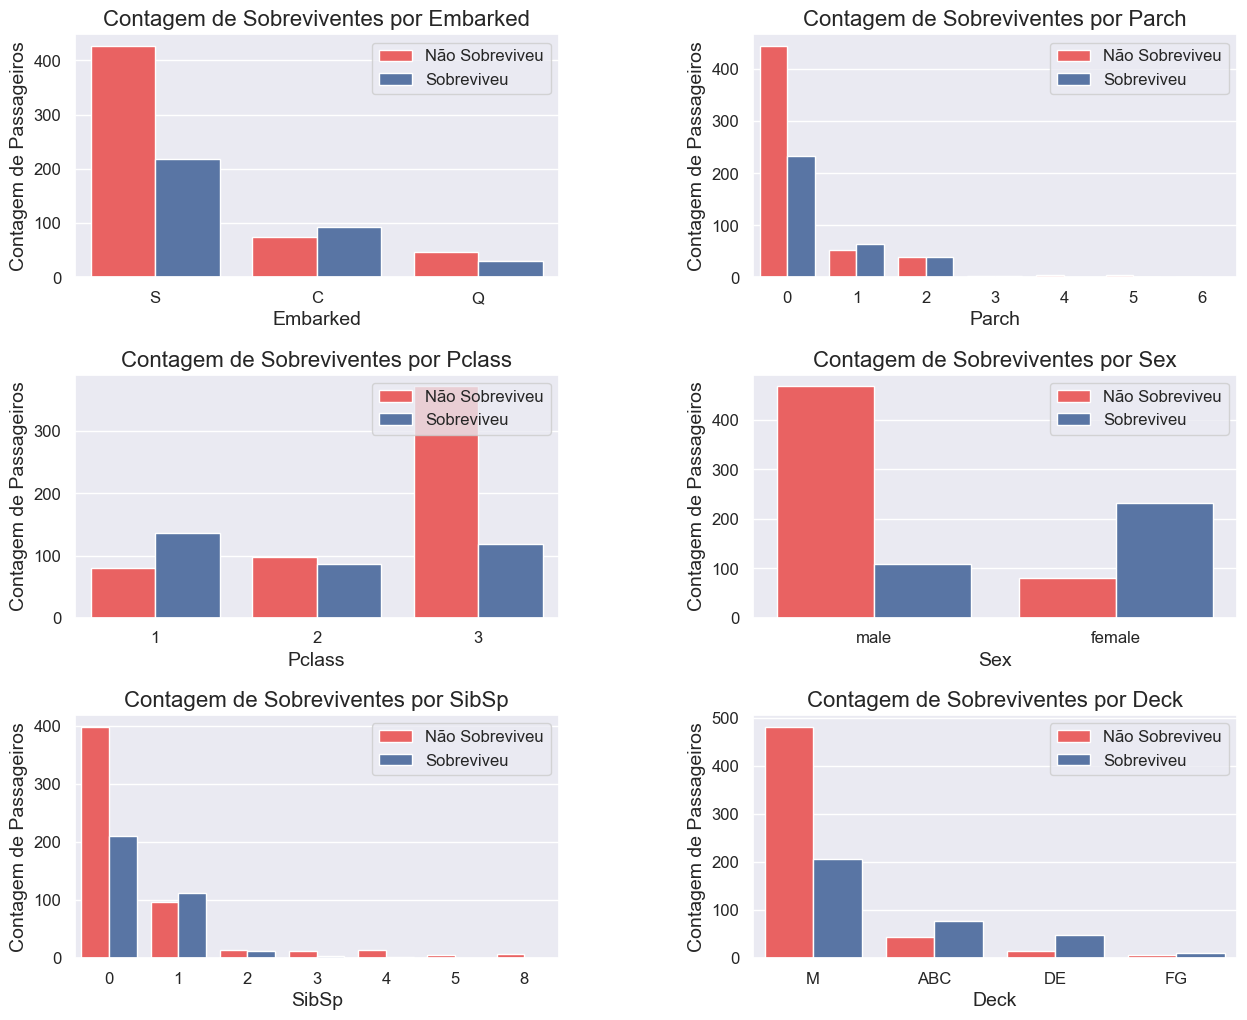

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis categóricas
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

# Criando a figura com subplots organizados em 3 linhas e 2 colunas
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Ajustando espaçamentos para melhor visualização
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterando sobre as features e os eixos correspondentes
for ax, feature in zip(axs.flatten(), cat_features):
    sns.countplot(x=feature, hue='Survived', data=df_train, ax=ax, 
                  palette=['#FF4C4C', '#4C72B0'])  # Cores definidas

    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Contagem de Passageiros', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right', fontsize=12)
    ax.set_title(f'Contagem de Sobreviventes por {feature}', fontsize=16)

# Exibir os gráficos
plt.show()


## `4.2 - Conclusão` 

A maioria das variáveis apresenta correlação entre si, uma relação que pode ser explorada para a criação de novas características por meio de transformações e interações de variáveis. Além disso, a técnica de target encoding pode ser particularmente útil, dada a forte correlação de algumas variáveis com a taxa de sobrevivência.

As variáveis contínuas exibem pontos de divisão e picos bem definidos, o que favorece a captura dessas informações por modelos baseados em árvores de decisão. No entanto, modelos lineares podem ter dificuldade em identificar tais padrões.

Já as variáveis categóricas apresentam distribuições bem distintas, com taxas de sobrevivência variáveis entre os diferentes grupos. Para melhor aproveitamento dessas informações, tais variáveis podem ser convertidas em representações numéricas através de one-hot encoding. Além disso, algumas delas podem ser combinadas para a criação de novas variáveis.

Por fim, durante a Análise Exploratória dos Dados (EDA), foi criada uma nova variável chamada Deck, substituindo a variável Cabin, que foi descartada por não agregar informações relevantes de forma isolada.

In [116]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## `5 - Feature Engineering`

## `5.1 - Fare | Tarifa`

A variável Tarifa apresenta uma distribuição assimétrica à direita, e a taxa de sobrevivência é significativamente mais alta na extremidade superior. Para lidar com essa característica, a variável foi segmentada em 13 intervalos baseados em quantis. Embora essa quantidade de grupos possa parecer excessiva, ela proporciona um ganho informativo considerável.

A análise revelou que os grupos situados à esquerda do gráfico possuem as menores taxas de sobrevivência, enquanto aqueles à direita apresentam as maiores taxas. Curiosamente, essa relação não era facilmente perceptível no gráfico original da distribuição.

Além disso, um grupo atípico foi identificado no intervalo (15.742, 23.25], que apresenta uma taxa de sobrevivência elevada, destoando do padrão geral. Esse detalhe, capturado pelo processo de discretização, destaca a importância de analisar as características dos dados em diferentes níveis de granularidade.

In [117]:
# Quebra da tarifa por faixas.

df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

In [118]:
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


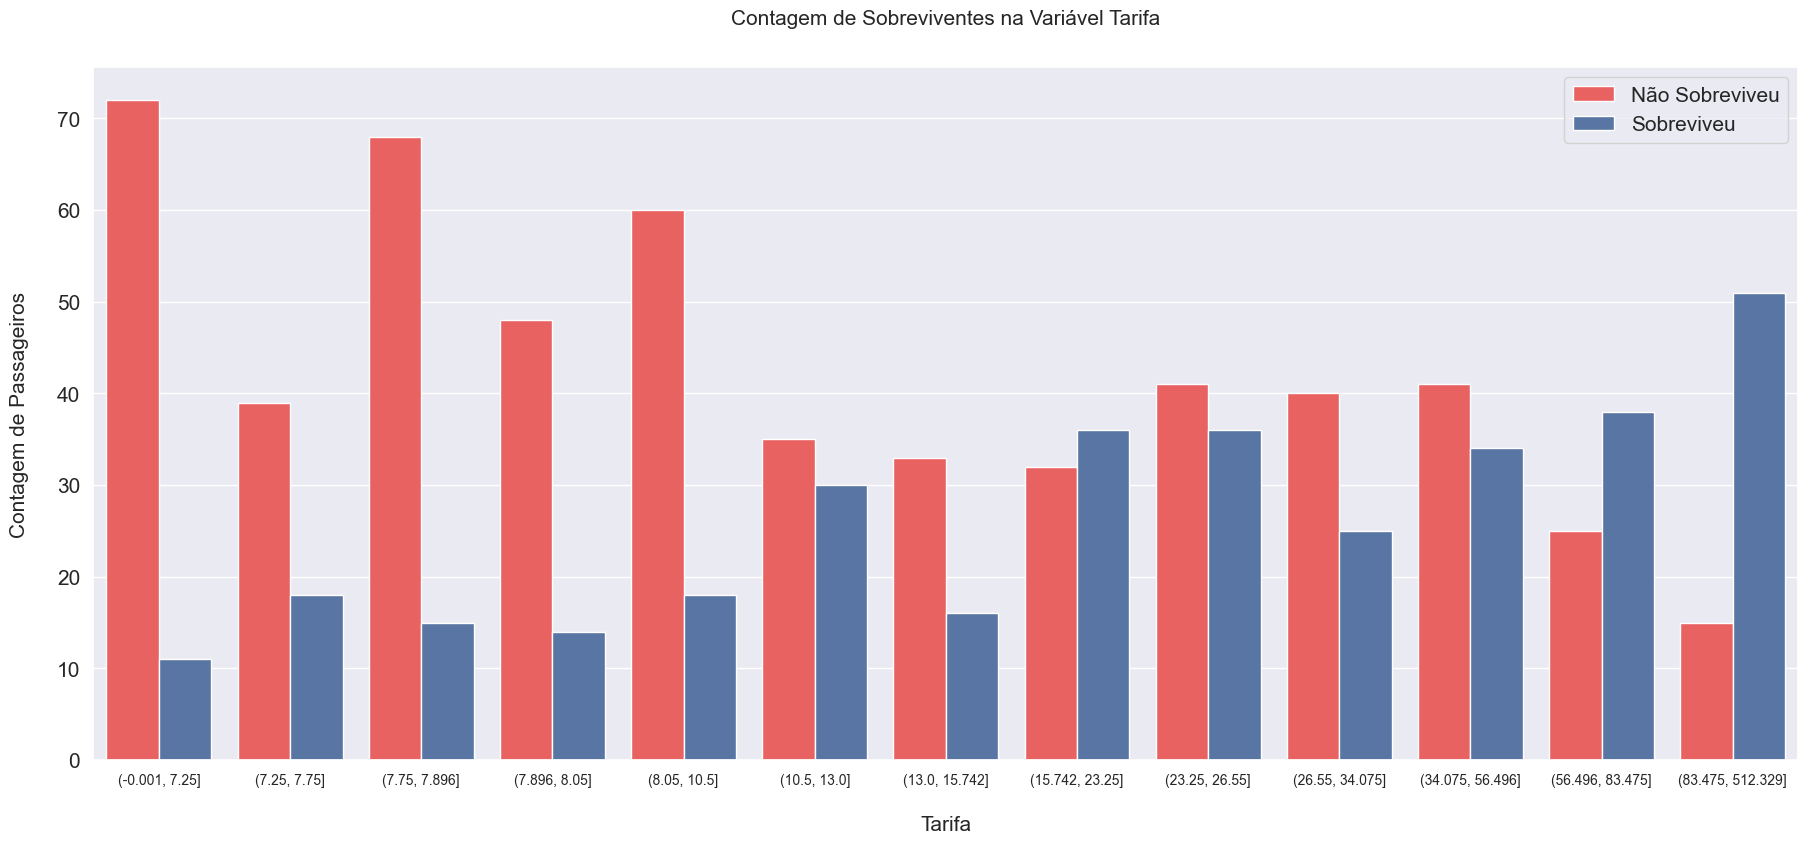

In [119]:
fig, axs = plt.subplots(figsize=(22, 9))

# Definindo a paleta de cores
sns.countplot(x='Fare', hue='Survived', data=df_all, palette=['#FF4C4C', '#4C72B0'])

plt.xlabel('Tarifa', size=15, labelpad=20)
plt.ylabel('Contagem de Passageiros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right', prop={'size': 15})
plt.title('Contagem de Sobreviventes na Variável Tarifa', size=15, y=1.05)

plt.show()

In [120]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

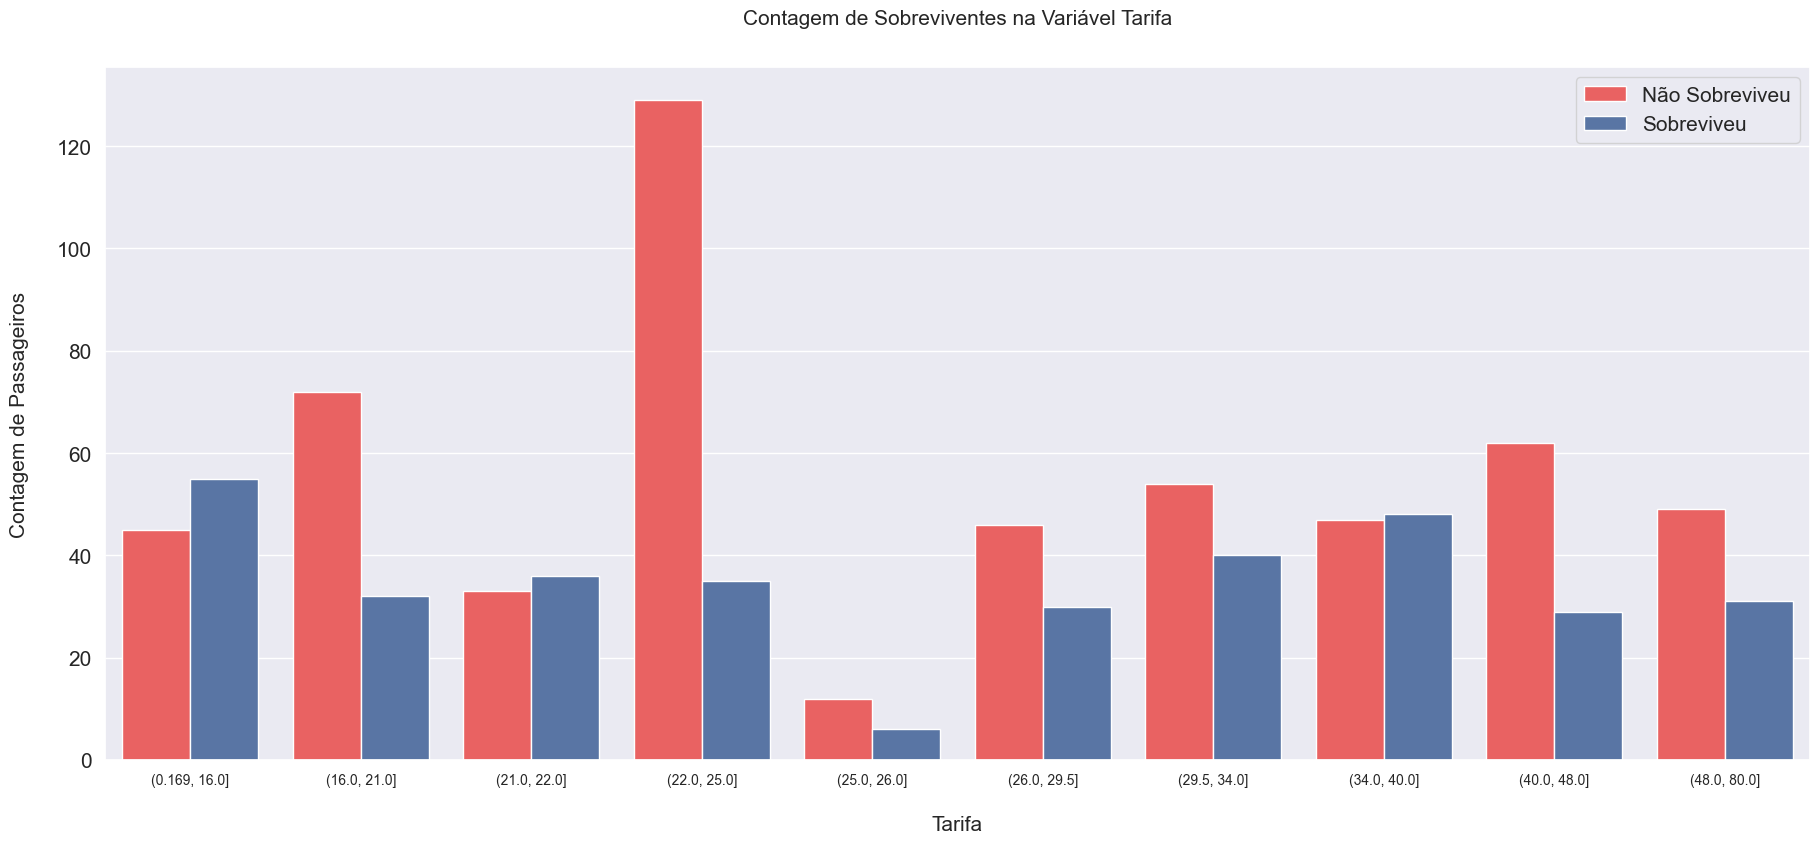

In [121]:
fig, axs = plt.subplots(figsize=(22, 9))

# Definindo a paleta de cores
sns.countplot(x='Age', hue='Survived', data=df_all, palette=['#FF4C4C', '#4C72B0'])

plt.xlabel('Tarifa', size=15, labelpad=20)
plt.ylabel('Contagem de Passageiros', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Não Sobreviveu', 'Sobreviveu'], loc='upper right', prop={'size': 15})
plt.title('Contagem de Sobreviventes na Variável Tarifa', size=15, y=1.05)

plt.show()

## `5.2 Codificação por frequência | Tamanho da familia`

A variável Family_Size foi criada somando as colunas SibSp (quantidade de irmãos e cônjuge), Parch (quantidade de pais e filhos) e 1, representando o próprio passageiro. Essa nova variável captura o tamanho total da família a bordo.

A análise gráfica demonstrou que o tamanho da família é um forte preditor de sobrevivência, pois diferentes tamanhos apresentam taxas de sobrevivência distintas. Para facilitar a modelagem, Family_Size foi categorizada da seguinte forma:

Alone: Passageiros sozinhos (Family_Size = 1)

Small: Famílias pequenas (Family_Size = 2, 3 ou 4)

Medium: Famílias médias (Family_Size = 5 ou 6)

Large: Famílias grandes (Family_Size = 7, 8 ou 11)

Essa segmentação permite capturar padrões de sobrevivência mais claramente, contribuindo para um modelo mais interpretável e eficaz.

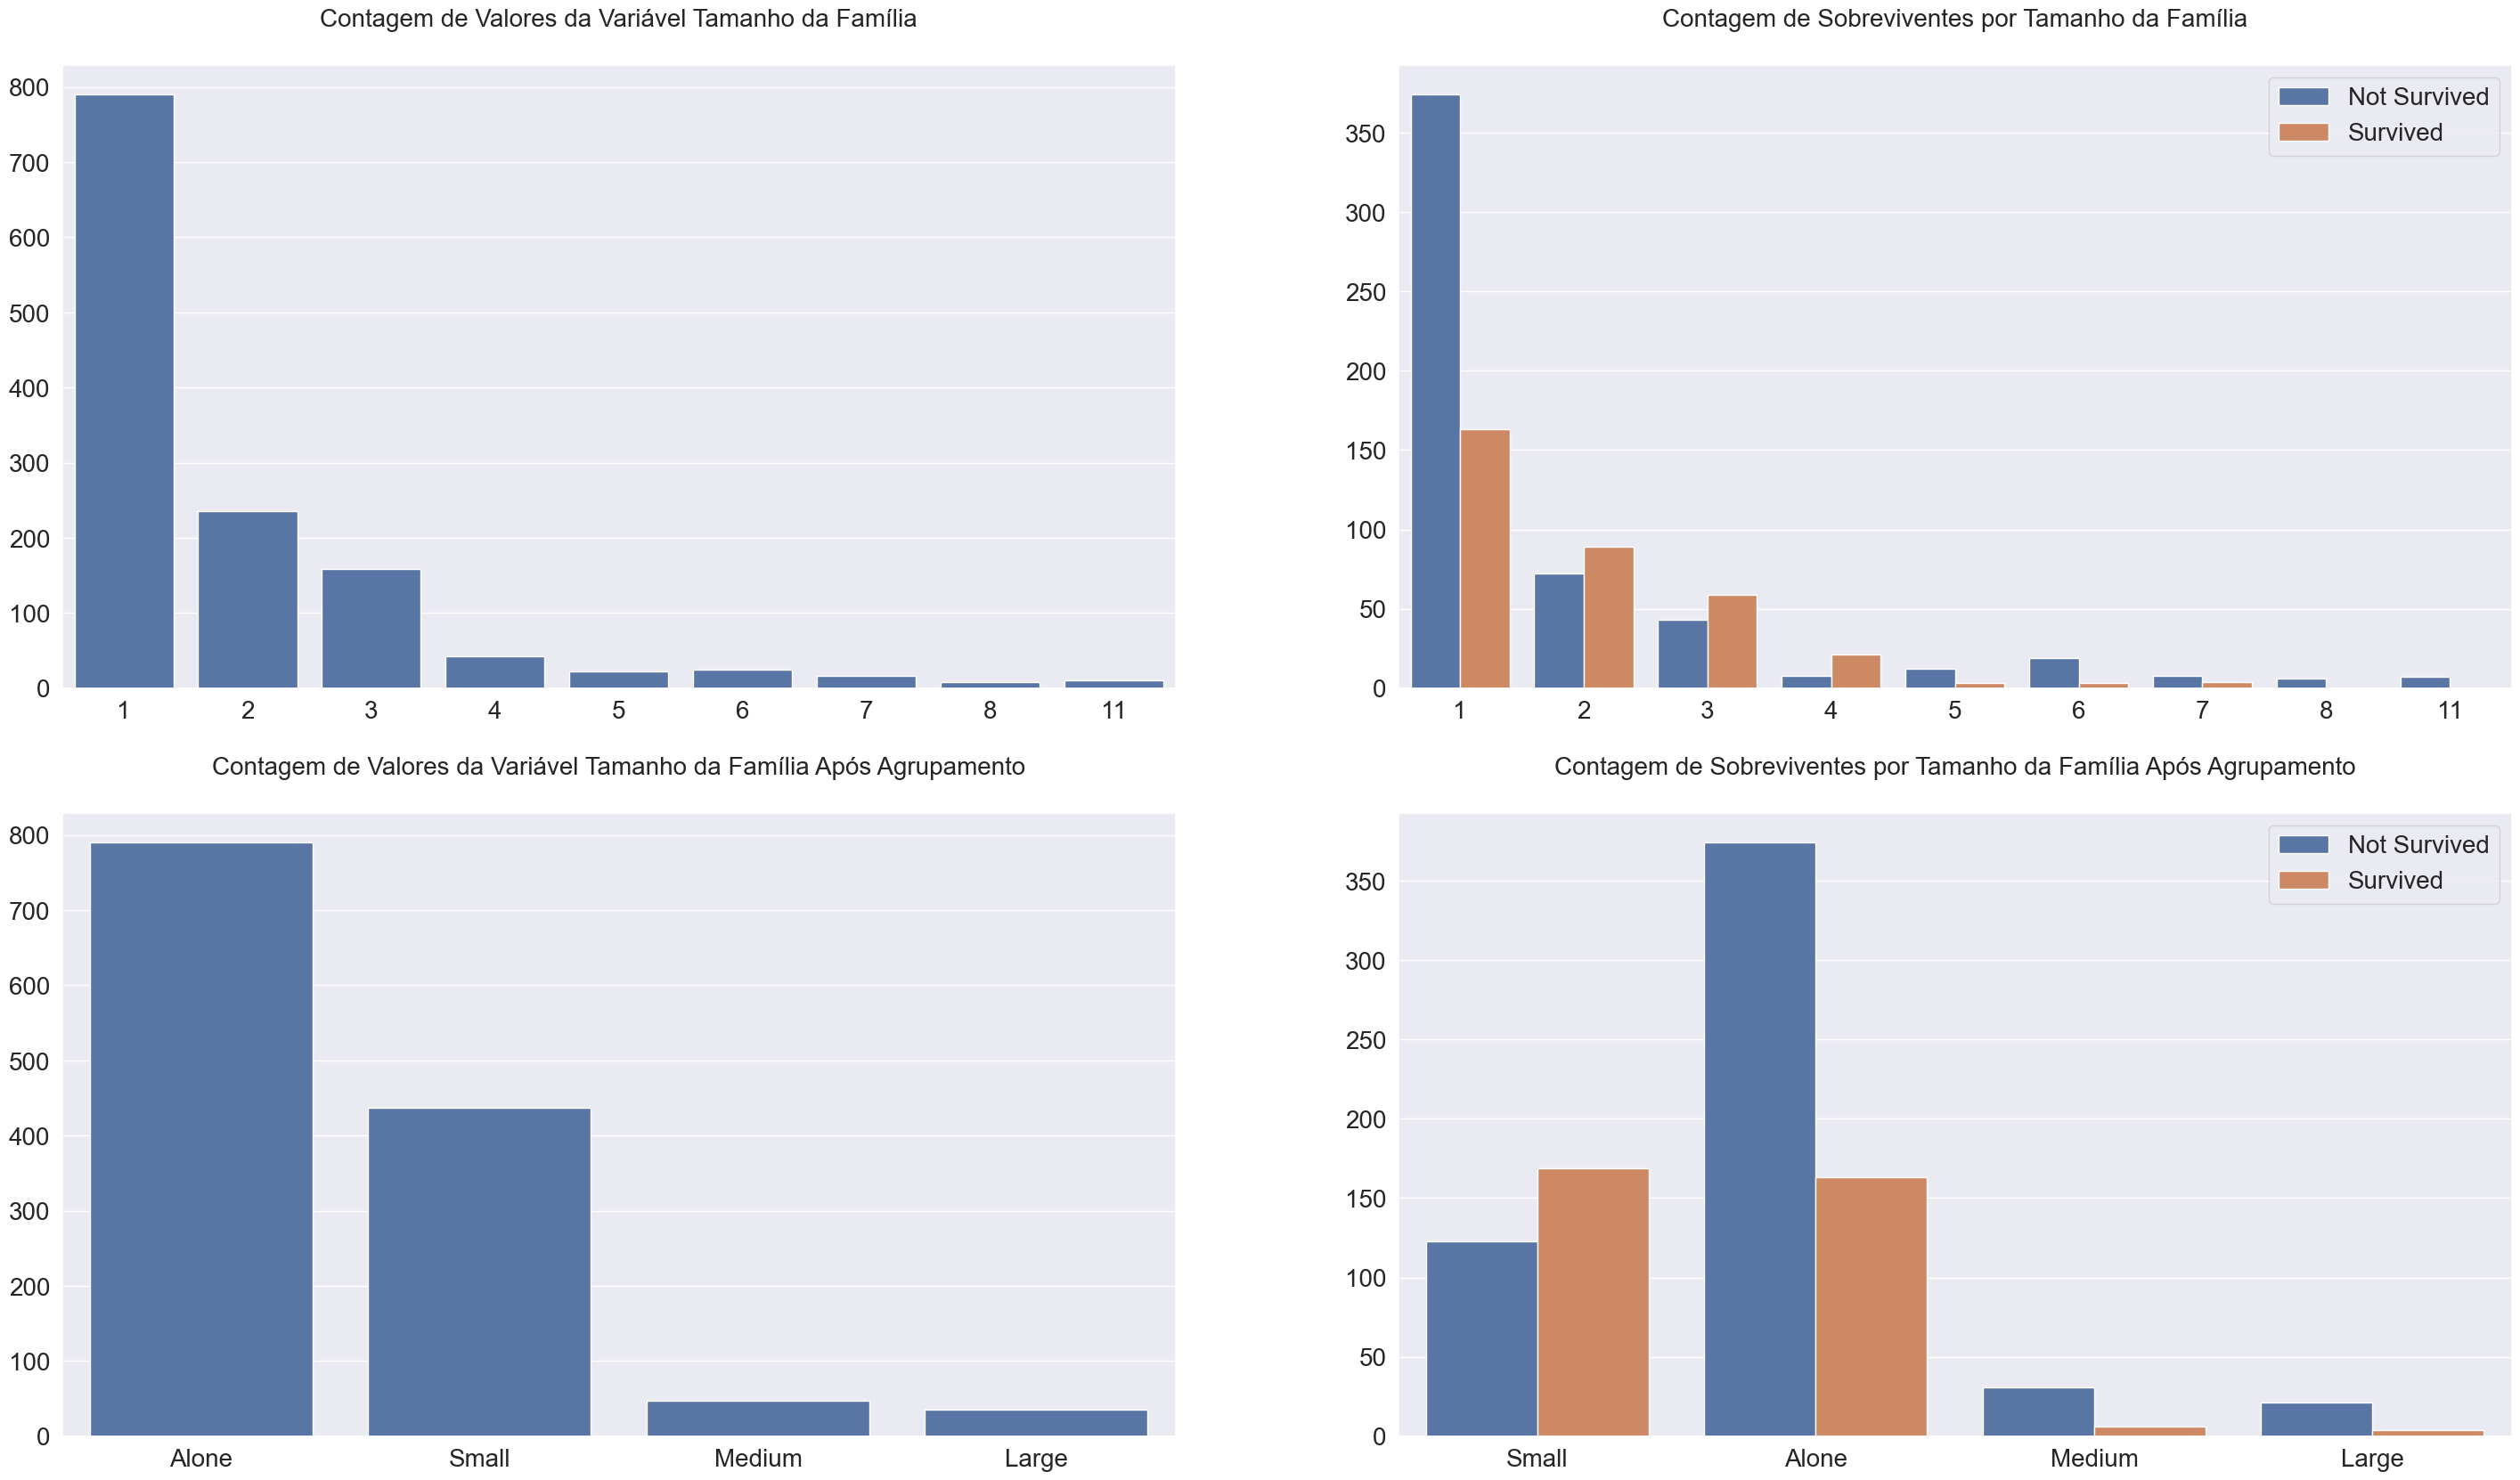

In [122]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Contagem de Valores da Variável Tamanho da Família', size=20, y=1.05)
axs[0][1].set_title('Contagem de Sobreviventes por Tamanho da Família', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Contagem de Valores da Variável Tamanho da Família Após Agrupamento', size=20, y=1.05)
axs[1][1].set_title('Contagem de Sobreviventes por Tamanho da Família Após Agrupamento', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

## `5.3 - Agrupamento pro frequencia de bilhete`

In [123]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

In [124]:
df_all

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,"(21.0, 22.0]",M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1
1,"(34.0, 40.0]",ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2
2,"(25.0, 26.0]",M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1
3,"(34.0, 40.0]",ABC,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2
4,"(34.0, 40.0]",M,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,Alone,1
1305,"(34.0, 40.0]",ABC,C,"(83.475, 512.329]","Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,1,Alone,3
1306,"(34.0, 40.0]",M,S,"(-0.001, 7.25]","Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,Alone,1
1307,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,Alone,1


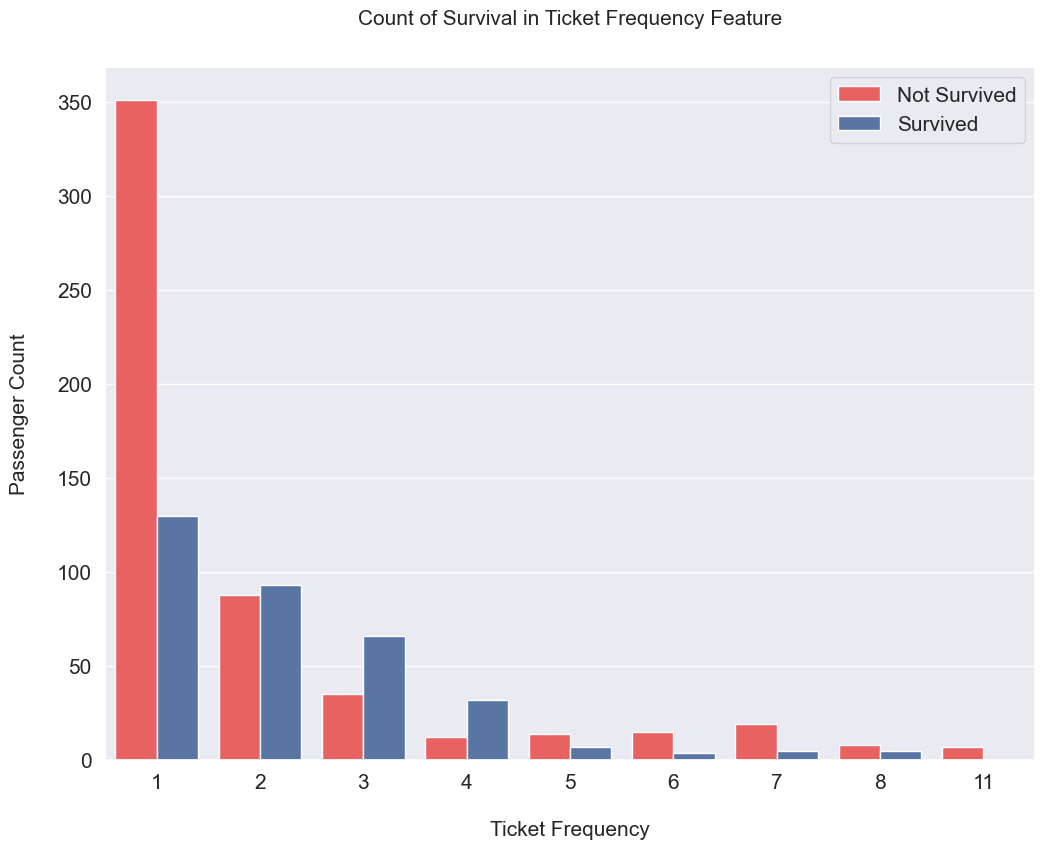

In [125]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all, palette=['#FF4C4C', '#4C72B0'])


plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()


## `5.3.1 Padrões de Sobrevivência`

A análise revelou um padrão semelhante ao de Family_Size:

Grupos de 2, 3 e 4 passageiros apresentaram maior taxa de sobrevivência.

Passageiros que viajaram sozinhos tiveram a menor taxa de sobrevivência.

Para grupos maiores que 4, a taxa de sobrevivência diminuiu drasticamente.

No entanto, Ticket_Frequency não foi agrupado da mesma forma que Family_Size, pois isso resultaria em duas variáveis altamente correlacionadas, sem ganho informativo adicional para o modelo.

## `5.4 - Titulo e Estado Civil`

A variável Title foi criada extraindo o prefixo antes do nome do passageiro. No entanto, algumas ocorrências são raras e precisam ser ajustadas.

Ajustes nos Títulos
Títulos femininos: Miss, Mrs, Ms, Mlle, Lady, Mme, The Countess e Dona foram agrupados como Miss/Mrs/Ms, pois todas representam passageiras do sexo feminino.

Mlle, Mme e Dona eram, na verdade, parte do nome das passageiras, mas foram classificadas como títulos porque a variável Name foi separada por vírgula.

Títulos relacionados a status social ou profissão: Dr, Col, Major, Jonkheer, Capt, Sir, Don e Rev foram agrupados como Dr/Military/Noble/Clergy, pois representam indivíduos com características semelhantes.

Master: Mantido como um título único, pois é atribuído a homens com menos de 26 anos. Esse grupo apresentou a maior taxa de sobrevivência entre os passageiros do sexo masculino.

Is_Married
A variável Is_Married foi criada como uma variável binária baseada no título Mrs, já que esse título indicava passageiras casadas.

O título Mrs apresentou a maior taxa de sobrevivência entre as mulheres, tornando relevante sua separação como uma nova variável.

Como todos os títulos femininos foram agrupados, essa distinção garante que a informação do estado civil seja preservada.

In [126]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

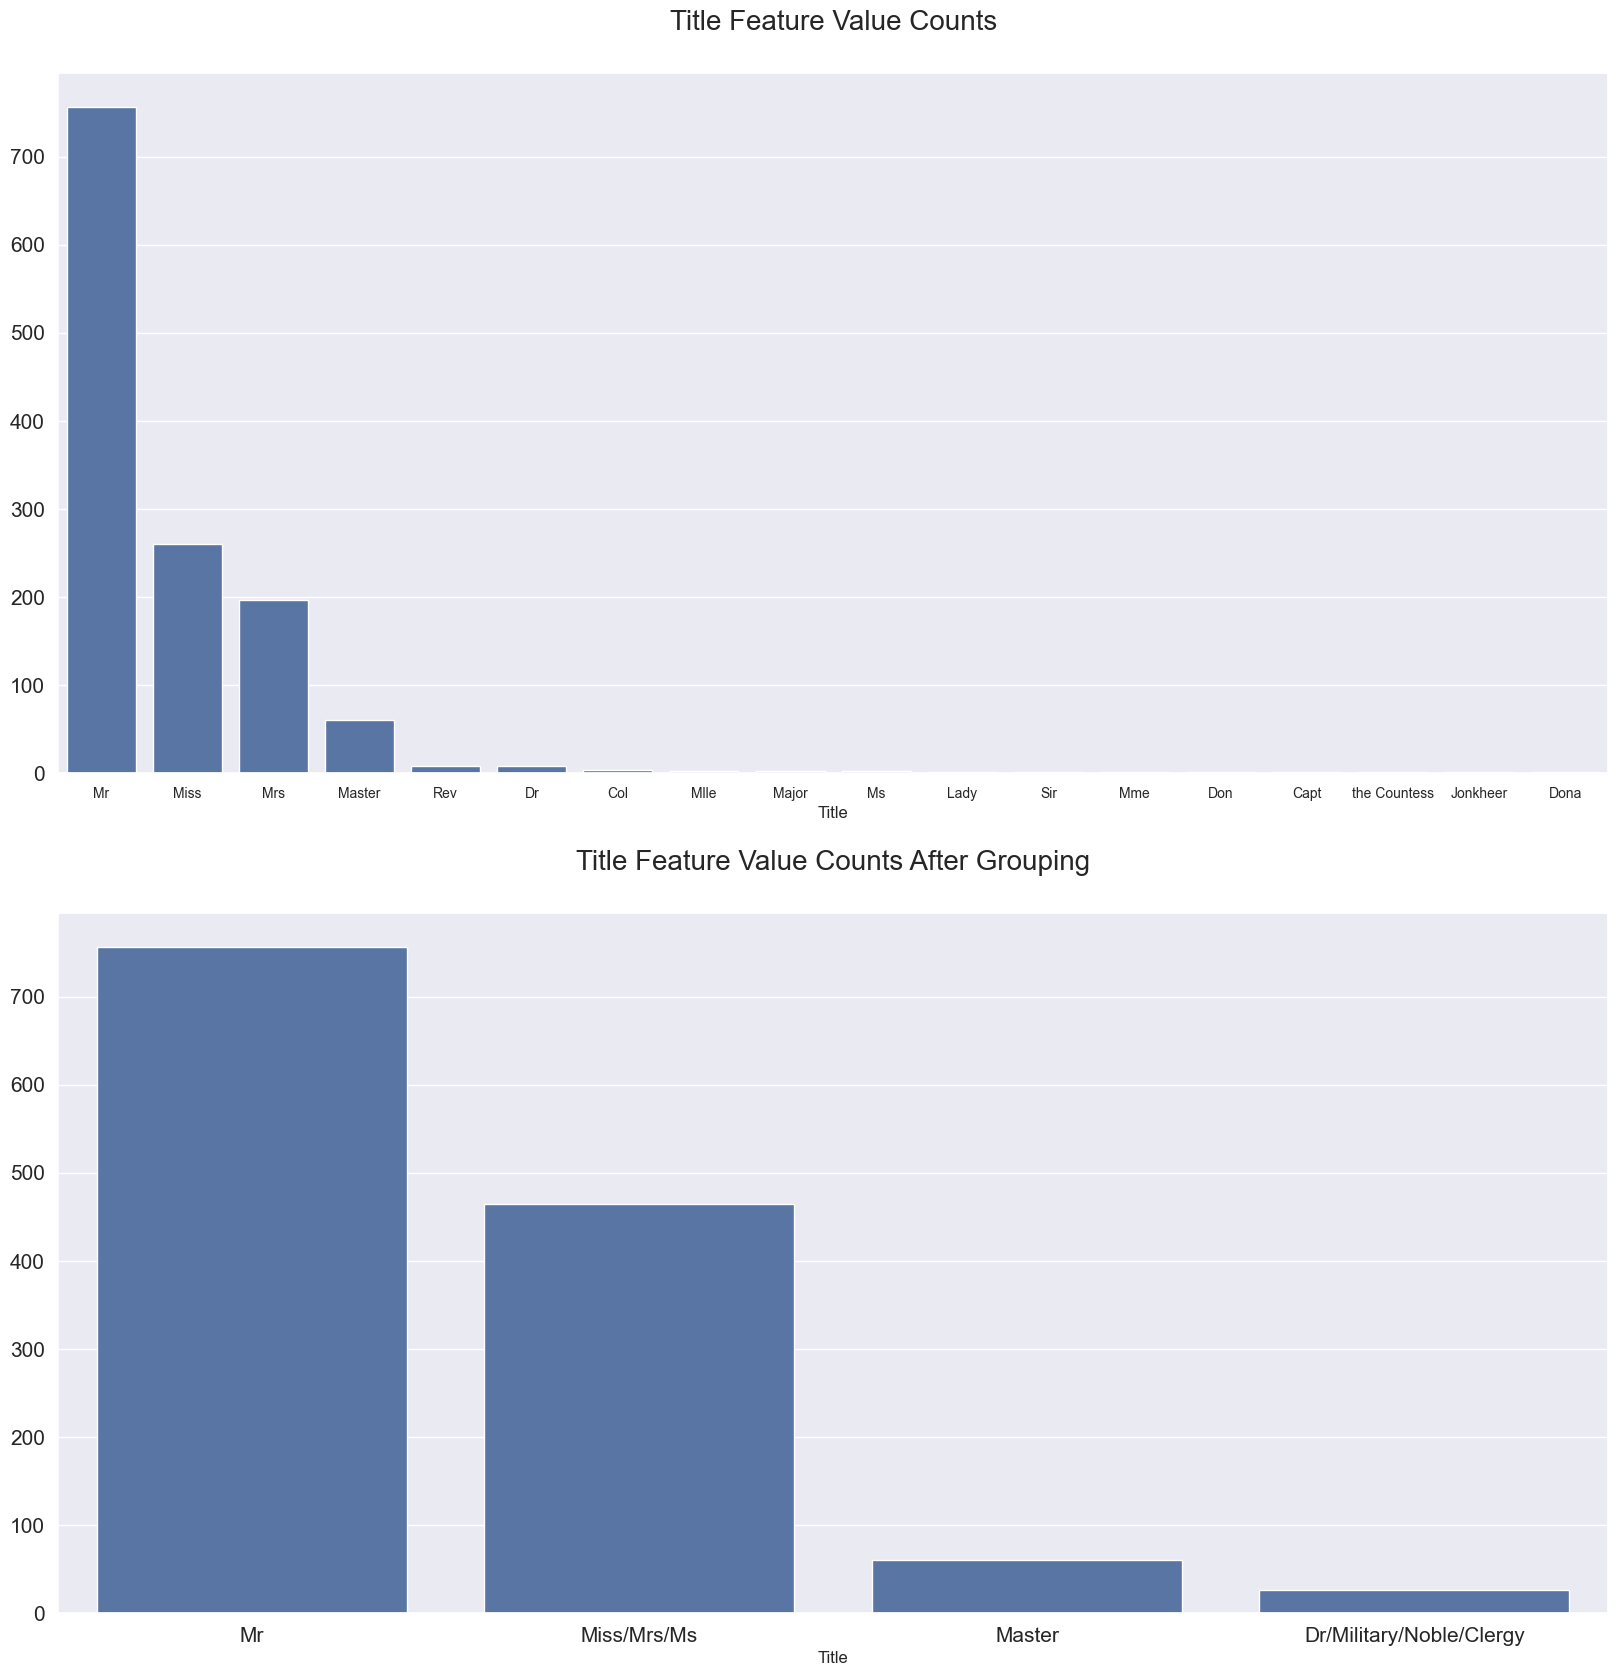

In [127]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

A função extract_surname foi utilizada para extrair os sobrenomes dos passageiros a partir da variável Name. Com essa informação, foi criada a variável Family, que agrupa passageiros pertencentes à mesma família.

Essa abordagem é útil para identificar padrões de sobrevivência baseados em famílias, permitindo que o modelo capture relações entre parentes e a probabilidade de sobrevivência associada a cada grupo familiar.

In [128]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [129]:
df_all

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family
0,"(21.0, 22.0]",M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0,Braund
1,"(34.0, 40.0]",ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1,Cumings
2,"(25.0, 26.0]",M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0,Heikkinen
3,"(34.0, 40.0]",ABC,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1,Futrelle
4,"(34.0, 40.0]",M,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,1,Alone,1,Mr,0,Spector
1305,"(34.0, 40.0]",ABC,C,"(83.475, 512.329]","Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,1,Alone,3,Miss/Mrs/Ms,0,Oliva y Ocana
1306,"(34.0, 40.0]",M,S,"(-0.001, 7.25]","Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,1,Alone,1,Mr,0,Saether
1307,"(22.0, 25.0]",M,S,"(7.896, 8.05]","Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,1,Alone,1,Mr,0,Ware


## `5.4.1 - Rate de sobrevivencia por familia e Ticket`

A variável Family_Survival_Rate foi calculada a partir das famílias presentes no conjunto de treinamento, já que o conjunto de teste não contém o campo Survived. Para isso, uma lista de sobrenomes de famílias que ocorrem tanto no conjunto de treinamento quanto no conjunto de teste (non_unique_families) foi criada.

A taxa de sobrevivência foi calculada para as famílias com mais de um membro nesta lista e armazenada na variável Family_Survival_Rate.

Family_Survival_Rate_NA
Foi criada uma variável binária chamada Family_Survival_Rate_NA para as famílias que são exclusivas do conjunto de teste. Essa variável indica que não é possível calcular a taxa de sobrevivência para essas famílias, pois não há informações suficientes para determinar o valor. Isso garante que o modelo saiba que a taxa de sobrevivência da família não é aplicável para esses passageiros.

Ticket_Survival_Rate e Ticket_Survival_Rate_NA
As variáveis Ticket_Survival_Rate e Ticket_Survival_Rate_NA foram criadas utilizando o mesmo método descrito para as famílias.

Cálculo Final de Survival Rate
A variável Survival_Rate foi então calculada como a média das taxas de sobrevivência de Ticket_Survival_Rate e Family_Survival_Rate. Da mesma forma, a variável Survival_Rate_NA foi calculada como a média de Ticket_Survival_Rate_NA e Family_Survival_Rate_NA.

Esses novos recursos ajudam a capturar informações de sobrevivência baseadas na família e no ticket, permitindo que o modelo aproveite essas interações ao realizar previsões para o conjunto de teste.

In [130]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]


df_family_survival_rate = df_train.groupby('Family')[['Survived', 'Family_Size']].median()
df_ticket_survival_rate = df_train.groupby('Ticket')[['Survived', 'Ticket_Frequency']].median()

family_rates = {}
ticket_rates = {}

# Preenchendo family_rates com as taxas de sobrevivência para famílias com mais de 1 membro
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

# Preenchendo ticket_rates com as taxas de sobrevivência para tickets com mais de 1 ocorrência
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]


In [131]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [132]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2 

In [133]:
df_train.head(3)

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
0,"(21.0, 22.0]",M,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,...,1,Mr,0,Braund,0.383838,0,0.383838,0,0.383838,0.0
1,"(34.0, 40.0]",ABC,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,2,Miss/Mrs/Ms,1,Cumings,1.000000,1,1.000000,1,1.000000,1.0
2,"(25.0, 26.0]",M,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,...,1,Miss/Mrs/Ms,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0


In [134]:
df_test.head(3)

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
891,"(34.0, 40.0]",M,Q,"(7.75, 7.896]","Kelly, Mr. James",0,892,3,male,0,...,1,Mr,0,Kelly,0.383838,0,0.383838,0,0.383838,0.0
892,"(40.0, 48.0]",M,S,"(-0.001, 7.25]","Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,...,1,Miss/Mrs/Ms,1,Wilkes,0.383838,0,0.383838,0,0.383838,0.0
893,"(48.0, 80.0]",M,Q,"(8.05, 10.5]","Myles, Mr. Thomas Francis",0,894,2,male,0,...,1,Mr,0,Myles,0.383838,0,0.383838,0,0.383838,0.0


## `6 - Feature Transformation`

## `6.1 Label Encoding de Características Não Numéricas`

As variáveis Embarked, Sex, Deck, Title e Family_Size_Grouped são do tipo object, enquanto as variáveis Age e Fare são do tipo category. Para que os modelos possam aprender com essas características, todas elas foram convertidas para o tipo numérico utilizando o LabelEncoder.

O LabelEncoder atribui um rótulo numérico para cada classe presente em uma variável, variando de 0 até n-1, onde n é o número de classes únicas. Este processo é fundamental para que modelos de aprendizado de máquina, como árvores de decisão ou modelos lineares, possam lidar com essas variáveis não numéricas de forma eficiente.

Após o Label Encoding, as variáveis passam a ter valores numéricos que representam suas respectivas categorias, tornando possível utilizá-las no treinamento de modelos.

In [135]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

## `6.2 - One-Hot Encoding das Características Categóricas`

As variáveis categóricas Pclass, Sex, Deck, Embarked e Title foram convertidas para variáveis one-hot codificadas usando o OneHotEncoder. A codificação one-hot cria uma nova coluna binária para cada categoria de uma variável, onde cada valor distinto de uma categoria é representado por uma coluna separada com valores 0 ou 1, indicando a presença ou ausência dessa categoria.

Por exemplo, para a variável Embarked, que possui três categorias possíveis (C, Q, S), o OneHotEncoder criaria três novas colunas, uma para cada categoria, com 1 indicando a presença da categoria para um passageiro e 0 caso contrário.

As variáveis Age e Fare, por outro lado, não foram convertidas, pois são variáveis ordinais. Isso significa que essas variáveis têm uma ordem natural (por exemplo, as faixas de idade ou faixas de preço), e sua conversão para uma codificação one-hot não faria sentido, pois perderia a relação de ordenação entre os valores.

In [136]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

## `6.3 - Conclusão`

As características Age e Fare foram divididas em intervalos (binned). A binarização ajudou a lidar com os outliers e revelou alguns grupos homogêneos dentro dessas variáveis. A variável Family_Size foi criada pela soma das características Parch e SibSp, além de adicionar 1 para incluir o passageiro atual. A variável Ticket_Frequency foi gerada contando as ocorrências dos valores na coluna Ticket.

A coluna Name revelou-se muito útil. Primeiramente, as variáveis Title e Is_Married foram criadas a partir do prefixo do título nos nomes dos passageiros. Em seguida, as variáveis Family_Survival_Rate e Family_Survival_Rate_NA foram geradas por target encoding do sobrenome dos passageiros. A variável Ticket_Survival_Rate foi criada da mesma forma, aplicando target encoding na coluna Ticket. A variável Survival_Rate foi calculada como a média das variáveis Family_Survival_Rate e Ticket_Survival_Rate.

Por fim, as variáveis do tipo não numérico foram label encoded, e as variáveis categóricas passaram por one-hot encoding. Ao todo, foram criadas 5 novas variáveis (Family_Size, Title, Is_Married, Survival_Rate e Survival_Rate_NA) e as variáveis desnecessárias foram descartadas após a codificação.

In [137]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


## `7. MODELO`

In [138]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


In [139]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000/")
mlflow.set_experiment(experiment_id=925405748012125969)

<Experiment: artifact_location='mlflow-artifacts:/925405748012125969', creation_time=1742680132985, experiment_id='925405748012125969', last_update_time=1742680132985, lifecycle_stage='active', name='titanic_survived', tags={}>

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  # Importação correta do modelo

# Assumindo que X_train e y_train já estão definidos
SEED = 42  # Definição da seed

with mlflow.start_run():
    mlflow.sklearn.autolog()  # Ativa o MLflow para log automático

    # Escolha do modelo
    # Para Decision Tree, descomente a linha abaixo:
    # clf = tree.DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=10, random_state=SEED)

    # Para RandomForest, descomente a linha abaixo e comente a DecisionTreeClassifier:
    clf = RandomForestClassifier(
        criterion='gini',
        n_estimators=1100,
        max_depth=5,
        min_samples_split=4,
        min_samples_leaf=5,
        max_features=None,  # 'auto' foi depreciado, use None para comportamento padrão
        oob_score=True,
        random_state=SEED,
        n_jobs=-1,
        verbose=1
    )

    # Treinamento do modelo
    clf.fit(X_train, y_train)

    # Predições no treino
    y_train_predict = clf.predict(X_train)

    # Cálculo da métrica
    acc_train = metrics.accuracy_score(y_train, y_train_predict)

    # Log no MLflow
    mlflow.log_metric("acc_train", acc_train)

    print("\nResultados finais:")
    print(f"Acurácia Train: {acc_train:.4f}")

    # Log do modelo treinado no MLflow
    mlflow.sklearn.log_model(clf, "modelo_treinado")
